FINM33601 - Fixed Income Derivatives

Homework 1

University of Chicago


Author: Laurent Lanteigne

ID: 12279717

Date: April 22nd, 2021

# 1. Forward Rate Agreements

1) Accrual period is December 16, 2020 to March 16, 2021. The accrural period for US LIBOR has a T+2 convention.

2) 90/360 

3) Prompt settlement since forward looking. Settlement payment will be made first day of the accrural period December 16, 2020. 

4) Since forward looking, the payment amount will be determined 3 months after contract is transacted, on December 14 2020. 

5) Sold FRA is being a lender. I will receive $\frac{N \cdot (r_{FRA} - r_{LIBOR}) \tau}{1+R \cdot \tau}$ , such that $N = 100000000$ is the notional amount in USD, $r_{FRA} = .0031$ , $r_{LIBOR} = .0021925$ is the 3 month USD LIBOR rate on December 14,2020  and $\tau = \frac{90}{360}$.

$$\frac{N \cdot (r_{FRA} - r_{LIBOR}) \tau}{1+R \cdot \tau} = \frac{100000000 \cdot (.0031 - .0021925) \cdot \frac{90}{360}}{1+.0021925 \cdot \frac{90}{360}}  = 22675.07\$ $$ 

6) You would beed to arrange for the deposit on December 18, 2020 to settle. According to quandl , the annualized rate is if 0.0018 so 

$$
0.0018504 \cdot \frac{90}{360} \cdot 22675.07 = 10.49\$
$$ 

7) To be paid at end of the accrural period on December June 16,2021.  

$$\frac{N \cdot (r_{FRA} - r_{LIBOR}) \tau}{1} = \frac{100000000 \cdot (.0031 - .0021925) \cdot \frac{90}{360}}{1}  = 22687.5\$ $$ 

8) At the end of the accrural period on March 16, 2021. We need to compound the daily SOFR rate each day for 3 months. Then annualize this return and compare to the strike rate of the contract. This is done in Python.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
SOFR = pd.read_excel('SOFR.xls', skiprows = 10)
SOFR.columns = ['Date','Rate']
SOFR['Rate'] /= 100
SOFR['Date'] = pd.to_datetime(SOFR['Date'])
SOFR = SOFR.dropna()
SOFR = SOFR.sort_values('Date', ascending = False)
SOFR['Days'] = pd.Timedelta(0)
for i in range(SOFR.shape[0]-1):
    SOFR.iloc[i,2] = SOFR.iloc[i,0] - SOFR.iloc[i+1,0] 
    
SOFR['Days'] = SOFR['Days'].apply(lambda x: int(str(x).split()[0]))
SOFR['Tau'] = SOFR['Days']

# In log returns
SOFR['log_return'] = np.log(SOFR['Tau'] * SOFR['Rate'] + 1)

S = np.sum(SOFR.loc[(SOFR['Date'] >= '2020-12-16') & (SOFR['Date'] <= '2021-03-16')]['log_return'])
term_rate = (np.exp(S) - 1) / np.sum(SOFR.loc[(SOFR['Date'] >= '2020-12-16') & (SOFR['Date'] <= '2021-03-16')]['Tau'])

payment = (.0007 - term_rate) * 10**(8) * np.sum(SOFR.loc[(SOFR['Date'] >= '2020-12-16') & (SOFR['Date'] <= '2021-03-16')]['Tau']) / 360
print('SOFR term rate: ',round(term_rate*100,5))
print('Payment: ',round(payment,2))

SOFR term rate:  0.05055
Payment:  4917.53


# 2. Deposit Futures

## 2.1 

In [3]:
Future_df = pd.read_csv('sqz.csv').dropna()
Future_df['Time'] = pd.to_datetime(Future_df['Time'] )
Future_df = Future_df[Future_df['Time'] >= '2020-09-14']
Future_df['Mark_to_Mkt'] = (Future_df['Last'] - float(Future_df.loc[Future_df['Time'] == '2020-09-14']['Last'])) * 2500 * 100
Future_df

,Time,Open,High,Low,Last,Change,%Chg,Volume,Open Int,Mark_to_Mkt
0,2021-03-16,99.9475,99.9475,99.9475,99.9475,0.0000,0.00%,0.0,0.0,4375.0
1,2021-03-15,99.9450,99.9475,99.9450,99.9475,0.0025,0.00%,30.0,55467.0,4375.0
2,2021-03-12,99.9475,99.9475,99.9450,99.9450,-0.0025,0.00%,11.0,55484.0,3750.0
3,2021-03-11,99.9450,99.9475,99.9450,99.9475,0.0025,0.00%,385.0,55484.0,4375.0
4,2021-03-10,99.9450,99.9450,99.9450,99.9450,-0.0025,0.00%,0.0,55815.0,3750.0
...,...,...,...,...,...,...,...,...,...,...
122,2020-09-18,99.9300,99.9300,99.9250,99.9250,-0.0050,-0.01%,7947.0,67906.0,-1250.0
123,2020-09-17,99.9300,99.9300,99.9250,99.9300,0.0000,0.00%,9472.0,66144.0,0.0
124,2020-09-16,99.9250,99.9350,99.9250,99.9300,0.0000,0.00%,5925.0,65336.0,0.0
125,2020-09-15,99.9250,99.9300,99.9250,99.9300,0.0000,0.00%,13590.0,64824.0,0.0


In [4]:
start_date = '2020-09-14'
end_date = '2021-03-16'
print('Our Initial and Final Quotes:')
Future_df.loc[Future_df['Time'].isin([start_date,end_date])][['Time','Last']].sort_index(ascending=False).set_index(['Time']).rename(columns={"Last": "Price"})

Our Initial and Final Quotes:


,Price
Time,
2020-09-14,99.9300
2021-03-16,99.9475


In [5]:
Future_df['Market Rate'] = (100 - Future_df['Last'])/100

print('Our Initial and Final Market Rates: ')
Future_df.loc[Future_df['Time'].isin([start_date,end_date])][['Time','Market Rate']].sort_index(ascending=False).set_index(['Time'])

Our Initial and Final Market Rates: 


,Market Rate
Time,
2020-09-14,0.000700
2021-03-16,0.000525


## 2.2

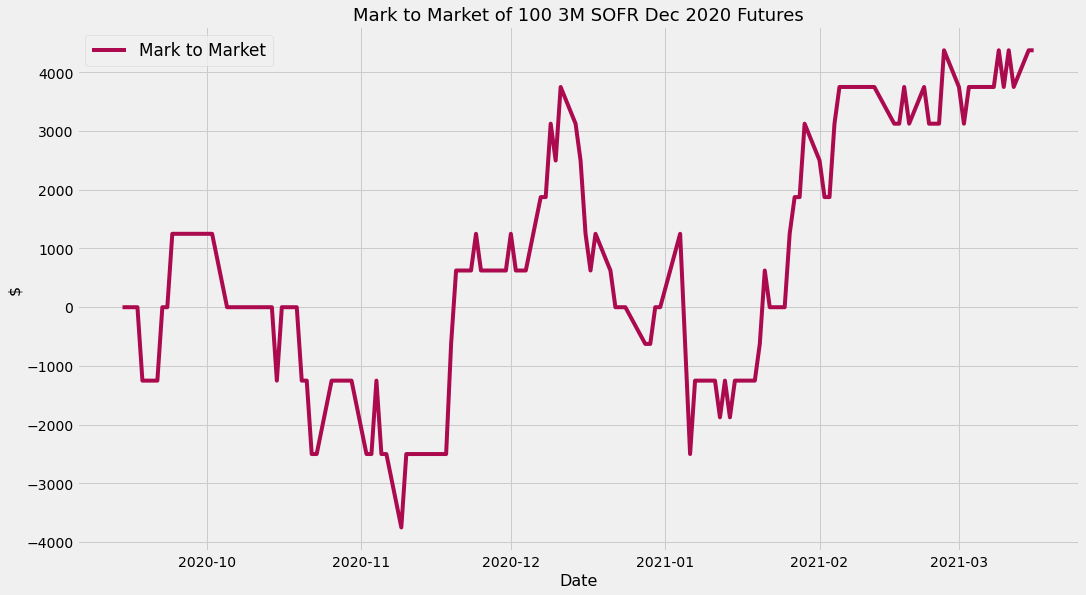

In [6]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(Future_df['Time'],Future_df['Mark_to_Mkt'], label = 'Mark to Market', c= np.random.rand(3,))

ax.set_title('Mark to Market of 100 3M SOFR Dec 2020 Futures', size = 18)
plt.ylabel('$', size = 16)
plt.xlabel('Date', size = 16)
plt.legend(fontsize = 'large')
plt.show()

In [7]:
print("Final marging account balance without interest is: {:.2f}".format(Future_df['Mark_to_Mkt'].iloc[0]))

Final marging account balance without interest is: 4375.00


## 2.3

In [8]:
Future_df.set_index(pd.to_datetime(Future_df['Time']), inplace = True)
Future_df.drop(['Time'], inplace = True, axis = 1)

In [9]:
SOFR.set_index(pd.to_datetime(SOFR['Date']), inplace = True)
SOFR.drop(['Date'], inplace = True, axis = 1)
SOFR = SOFR[SOFR.index.isin(Future_df.index)]
merged_df = Future_df.merge(SOFR, left_index = True, right_index=True)
merged_df

,Open,High,Low,Last,Change,%Chg,Volume,Open Int,Mark_to_Mkt,Market Rate,Rate,Days,Tau,log_return
2021-03-16,99.9475,99.9475,99.9475,99.9475,0.0000,0.00%,0.0,0.0,4375.0,0.000525,0.0001,1,1,0.000100
2021-03-15,99.9450,99.9475,99.9450,99.9475,0.0025,0.00%,30.0,55467.0,4375.0,0.000525,0.0001,3,3,0.000300
2021-03-12,99.9475,99.9475,99.9450,99.9450,-0.0025,0.00%,11.0,55484.0,3750.0,0.000550,0.0001,1,1,0.000100
2021-03-11,99.9450,99.9475,99.9450,99.9475,0.0025,0.00%,385.0,55484.0,4375.0,0.000525,0.0001,1,1,0.000100
2021-03-10,99.9450,99.9450,99.9450,99.9450,-0.0025,0.00%,0.0,55815.0,3750.0,0.000550,0.0002,1,1,0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-18,99.9300,99.9300,99.9250,99.9250,-0.0050,-0.01%,7947.0,67906.0,-1250.0,0.000750,0.0009,1,1,0.000900
2020-09-17,99.9300,99.9300,99.9250,99.9300,0.0000,0.00%,9472.0,66144.0,0.0,0.000700,0.0010,1,1,0.001000
2020-09-16,99.9250,99.9350,99.9250,99.9300,0.0000,0.00%,5925.0,65336.0,0.0,0.000700,0.0010,1,1,0.001000
2020-09-15,99.9250,99.9300,99.9250,99.9300,0.0000,0.00%,13590.0,64824.0,0.0,0.000700,0.0010,1,1,0.001000


In [10]:
merged_df['Interest'] = 0
merged_df['SOFR_rate'] = merged_df['Rate']
merged_df['OG_Mark-to-Mkt'] = merged_df['Mark_to_Mkt']
merged_df['NEW_Mark-to-Mkt'] = 0

for i, date in reversed(list(enumerate(reversed(merged_df.index)))):
    merged_df.loc[date,'Interest'] = (merged_df.loc[date,'OG_Mark-to-Mkt'] + np.sum(merged_df.tail(merged_df.shape[0]-i)['Interest']))* merged_df.loc[date,'SOFR_rate'] * merged_df.loc[date,'Days']
    merged_df['NEW_Mark-to-Mkt'] = merged_df['OG_Mark-to-Mkt'] + np.sum(merged_df.tail(merged_df.shape[0]-i)['Interest'])

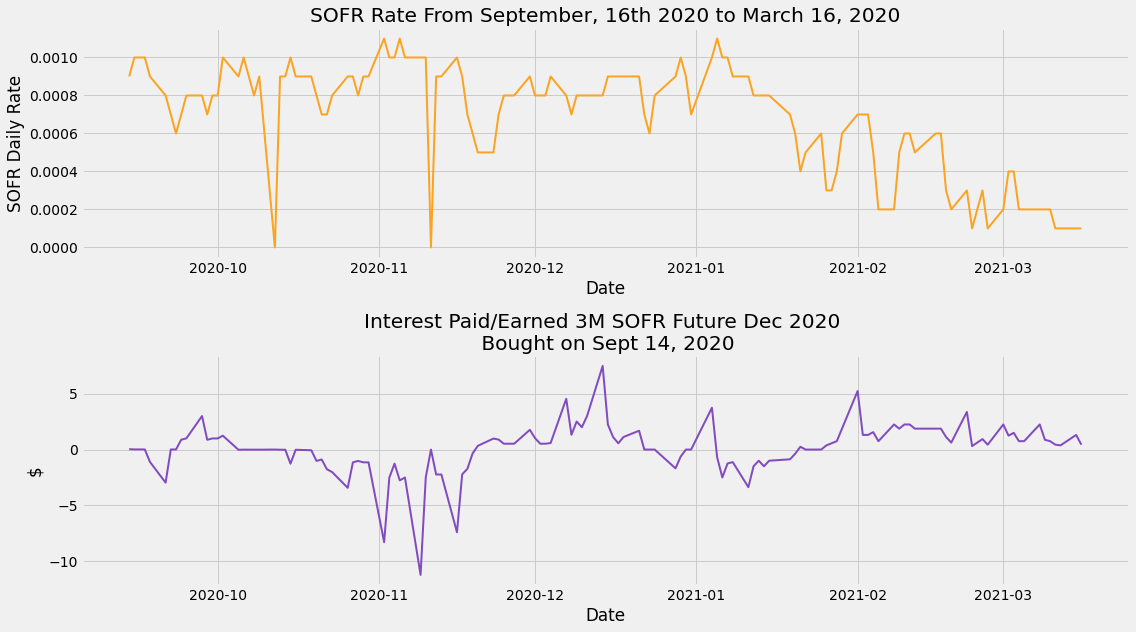

In [23]:
fig, ax = plt.subplots(2,1,figsize=(16,9), tight_layout = True)

ax[0].plot(merged_df.index ,merged_df['Rate'], lw = 2,label = 'SOFR Rate', c= np.random.rand(3,))
ax[0].set_ylabel('SOFR Daily Rate')
ax[0].set_xlabel('Date')
ax[0].set_title('SOFR Rate From September, 16th 2020 to March 16, 2020')

ax[1].plot(merged_df.index ,merged_df['Interest'], lw = 2,label = 'Interest', c= np.random.rand(3,))
ax[1].set_ylabel('$')
ax[1].set_xlabel('Date')
ax[1].set_title('Interest Paid/Earned 3M SOFR Future Dec 2020 \n Bought on Sept 14, 2020')


plt.show()

In [18]:
print('Final Balance with interest: ',round(float(merged_df.loc[merged_df.index == '2021-03-16']['NEW_Mark-to-Mkt']),2))

print('FRA Settlement with market rate of future: ',round((.0007 - .000525) * 10**(8) * np.sum(SOFR.loc[(SOFR.index >= '2020-12-16') & (SOFR.index <= '2021-03-16')]['Tau']) / 360,2))


Final Balance with interest:  4387.9
FRA Settlement with market rate of future:  4034.72


## 2.4

Note, there seems to be some inconsistency in the SOFR rate, might just come from data manipulation. But generally, we see a downward trend which was expected.

With and without interest we see a different settlement amount when comparing to the SOFR FRA. This is because the market implied SOFR rate is different than the one we calculated (0.000525 vs 0.0005055).

Our balanced increased since we mostly had a positive position but only by 12.9 which is about 25 bps. The effect would have been larger if instead of SOFR decreasing over time, it would have been increasing.  Looking at the first graph other than some data irregularities, there is a clear downward slopping trend in the SOFR rate which affected the interest earn on our position. If rate had increased, we would have hold more of a negative position and get paid more through SOFR, we have assymmetric risk. Also worth nothing, while the net interest gain is positive, in terms of absolute the largest interest exchanged was from us to the counter party.  



# 3. Interest Rate Swaps

Lets define

$$
V_{FIX}(0) = \sum_{i=1}^n c\tau_i P(0,t_i), \quad V_{FLOAT} = \sum_{i=1}^n R(0,t_{i-1},t_i)\tau_i P(0,t_i)
$$

Let $ 0 < T < M < n,t_j = T, t_{j+1} = M$,

$\tau_i = \tau \; \forall i \text{ and } i \in [0,n] \cap \mathbb{Z}$. 

Let $R(0,t_j,t_{j+1}) = R(0,T,M) = \mathcal{X}$

Let's $V_{FIX}(0)=V_{FLOAT}(0)$,

but $\mathcal{X} \neq \frac{1}{\tau}\left(\frac{P(0,T)}{P(0,M)}-1\right)$.

We can compute $V_{FIX}(0)$, 

$$
V_{FIX}(0) = \sum_{i=1}^n \left(\frac{P(0,t_0)-P(0,t_n)}{\sum_{i=1}^n\tau P(0,t_i)}\right)\tau P(0,t_i) = P(0,t_0)-P(0,t_n)
$$

$$
V_{FLOAT}(0) =  \tau\left[\sum_{i=1}^j \frac{1}{\tau}\left(\frac{P(0,t_{i-1})}{P(0,t_i)}-1\right)P(0,t_i) + \mathcal{X}P(0,M) + \sum_{i=j+1}^n \frac{1}{\tau}\left(\frac{P(0,t_{i-1})}{P(0,t_i)}-1\right)P(0,t_i)\right]
$$
$$
V_{FLOAT}(0) =  \sum_{i=1}^n \left(\frac{P(0,t_{i-1})}{P(0,t_i)}-1\right)P(0,t_i) + \tau\mathcal{X}P(0,M) - \left(\frac{P(0,t_j)}{P(0,t_{j+1})}-1\right)P(0,t_{j+1})
$$
$$
V_{FLOAT}(0) =  \underbrace{\sum_{i=1}^n \left(\frac{P(0,t_{i-1})}{P(0,t_i)}-1\right)P(0,t_i)}_{\alpha} + \underbrace{\tau\mathcal{X}P(0,M) - \left(\frac{P(0,T)}{P(0,M)}-1\right)P(0,M)}_{\beta}
$$

$$
\alpha = \sum_{i=1}^n \frac{1}{\tau}\left(\frac{P(0,t_{i-1})}{P(0,t_i)}-1\right)P(0,t_i) = \underbrace{\sum_{i=1}^n \left(P(0,t_{i-1})-P(0,t_i)\right)}_{\text{telescoping sum!}} = P(0,t_0) - P(0,t_n) = V_{FIX}(0)
$$

$$
\Rightarrow V_{FLOAT}(0) = V_{FIX}(0) + \beta 
$$

If 
$$
\mathcal{X} < \frac{1}{\tau}\left(\frac{P(0,T)}{P(0,M)}-1\right) \rightarrow V_{FLOAT}(0) < V_{FIX}(0)\quad \quad (1)
$$
else, if
$$
\mathcal{X} > \frac{1}{\tau}\left(\frac{P(0,T)}{P(0,M)}-1\right) \rightarrow V_{FLOAT}(0) > V_{FIX}(0) \quad \quad (2)
$$

But, we've set up the problem such that  $V_{FLOAT}(0) = V_{FIX}(0)$. So in the first case the float is overvalued so we want to short the floating leg of the swap and take a long position in the fixed one. In case (2), we want to take the opposite of that trade. For the first case, we can also borrow at the forward rate, sell T bond and buy M bond. By selling the T bond and buying M bond we receive initial premium upfront. We pay off value of the T bond with we we borrowed and receive M bond at time B, and we end up lending at a higher rate from period between T and M. For the second case, we can lend the forward rate, buy T bond and sell M bond and we end up borrowing at a lower rate between T and M. 